<a href="https://colab.research.google.com/github/PaolaMaribel18/hands-on-2023A/blob/master/notebooks/13_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 13 Long Short-Term Memory (LSTM) networks

LSTM networks stand as a powerful solution to one of the most persistent challenges in training recurrent neural networks (RNNs): the vanishing gradient problem.

In traditional RNNs, the gradients can become very small as they propagate back through time, which impedes the networks' ability to capture long-range dependencies in sequential data. LSTMs address this issue with an ingenious architectural design that includes specialized memory cells and gating mechanisms. Each LSTM cell possesses the ability to remember or forget information over extended sequences, rendering them particularly adept at modeling sequences with extended gaps between relevant information.

The core of the LSTM architecture is its three gating mechanisms: the input gate, the forget gate, and the output gate. These gates allow LSTMs to determine what information to store, what information to discard, and how to update the cell's memory state. This unique design empowers LSTMs to effectively learn and maintain long-term dependencies in sequential data, making them a preferred choice for tasks such as machine translation, speech recognition, and sentiment analysis where capturing context over extended sequences is essential.

## Exercise

Build an LSTM network to predict stock prices based on historical stock data. Show the model's ability to capture sequential dependencies.

In [20]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM

###Data Preparation
* Divide the dataset into training and testing sets.
* Normalize the data to ensure that all features are within a similar scale.

In [21]:
# Fetch historical stock data using yfinance
stock_symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2023-01-01"
stock_data = yf.download(stock_symbol, start=start_date, end=end_date, progress=False)

# Extract the 'Close' prices
stock_prices = stock_data["Close"].values.reshape(-1, 1)

Normalization

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
stock_prices_scaled = scaler.fit_transform(stock_prices)

In [28]:
# Define the number of time steps for the LSTM model
time_steps = 10

# Function to create sequences and labels
def create_sequences(data, time_steps):
    sequences = []
    labels = []
    for i in range(len(data) - time_steps - 1):
        sequences.append(data[i : i + time_steps])
        labels.append(data[i + time_steps + 1])
    return np.array(sequences), np.array(labels)

# Create sequences and labels
x, y = create_sequences(stock_prices_scaled, time_steps)

In [29]:
# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(sequences))
x_train, x_test = sequences[:split_index], sequences[split_index:]
y_train, y_test = labels[:split_index], labels[split_index:]

Model Architecture:
* Create an LSTM model architecture. The architecture should include one or more LSTM layers, followed by one or more Dense layers for regression.
* Explain the concept of input sequences and time steps, as well as how to reshape the data to fit the LSTM input format.

In [30]:
# Build the LSTM model
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))

In [31]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Model Training:
* Train the LSTM model using the training data. Explain the importance of setting appropriate hyperparameters, such as batch size and number of epochs.
* Monitor the training progress by plotting loss curves and observing how the model's performance changes over epochs.


In [32]:
# Train the model
batch_size = 32
epochs = 50
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
19/19 [==============================] - 5s 58ms/step - loss: 0.0911 - val_loss: 0.0275
Epoch 2/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0073 - val_loss: 0.0037
Epoch 3/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 4/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 5/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 6/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 7/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 8/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 9/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 10/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 11/50
19/19 

Model Evaluation:
* Use the trained model to make predictions on the testing data.
* Evaluate the model's performance using appropriate metrics like Mean Squared Error (MSE) or Root Mean Squared Error (RMSE).

In [33]:
# Use the trained model to make predictions
y_pred = model.predict(x_test)

# Inverse transform the scaled predictions and labels to their original scale
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

5/5 [==============================] - 1s 3ms/step


In [34]:
# Calculate Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_original, y_pred_original)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 25.228904897026176


Visualization:
* Plot the true stock prices and the predicted stock prices over time to visually assess the model's predictions.

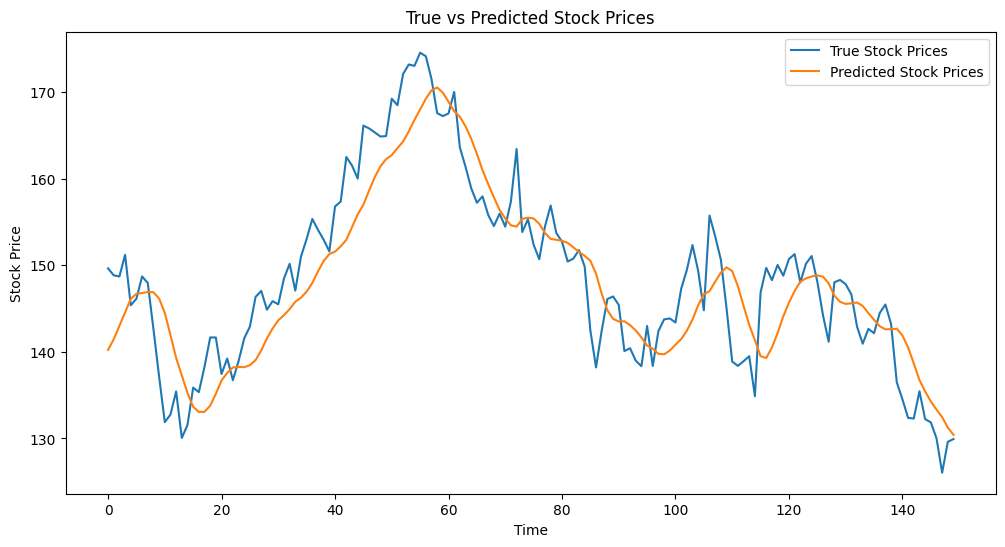

In [35]:
# Plot true stock prices vs predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label="True Stock Prices")
plt.plot(y_pred_original, label="Predicted Stock Prices")
plt.title("True vs Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()
